<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/DataAnalysisMod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python
# Ejercicios Modulo 4
# Estudiante: CARLOS GUSTAVO LOPEZ
# Matrícula: A01793468

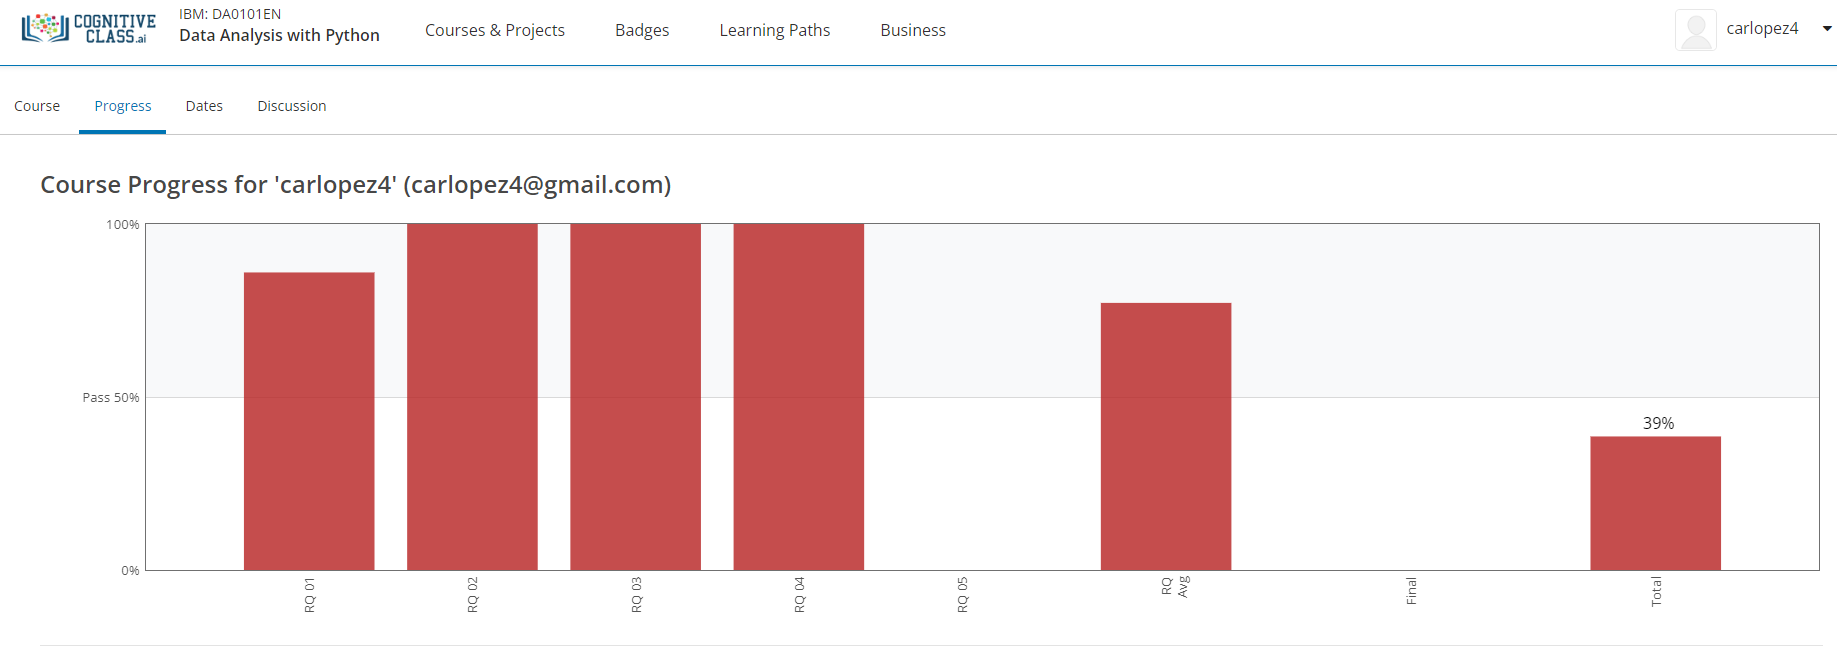

1. Import Data from Module 2

In [13]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import pandas as pd
import numpy as np
import matplotlib as mp
import scipy as s
import seaborn as sns
import ipywidgets as ip
import tqdm as tq
import matplotlib.pylab as plt
from scipy import stats

from sklearn.linear_model import LinearRegression


In [10]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [9]:
#from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [11]:
filename="auto.csv"

In [12]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


1. Linear Regression and Multiple Linear Regression
Linear Regression
One example of a Data Model that we will be using is:

Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

2. Analyzing Individual Feature Patterns Using Visualization

How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [14]:
lm = LinearRegression()

LinearRegression()

How could "highway-mpg" help us predict car price?
For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [15]:
X = df[['highway-mpg']]
Y = df['price']

In [16]:
lm.fit(X,Y)

LinearRegression()

In [17]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
#What is the value of the intercept (a)?
lm.intercept_

38423.3058581574

In [19]:
#What is the value of the slope (b)?
lm.coef_

array([-821.73337832])

Question #1 a): 
Create a linear regression object called "lm1".

In [20]:
lm1 = LinearRegression()

LinearRegression()

Question #1 b): 
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [22]:
lm1.fit(df[['engine-size']], df[['price']])

LinearRegression()


Question #1 c):
Find the slope and intercept of the model.

In [26]:
print (lm1.coef_)
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


Question #1 d): 
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [27]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

Multiple Linear Regression

In [29]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])
lm.intercept_
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Question #2 a): 
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [30]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

Question #2 b): 
Find the coefficient of the model.

In [31]:
lm2.coef_

array([   1.49789586, -820.45434016])

2. Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Regression Plot
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48179.13101602219)

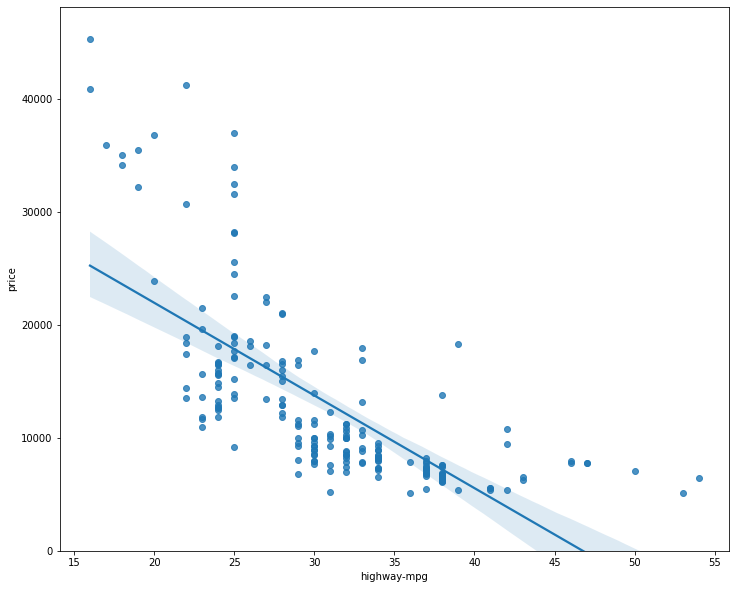

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

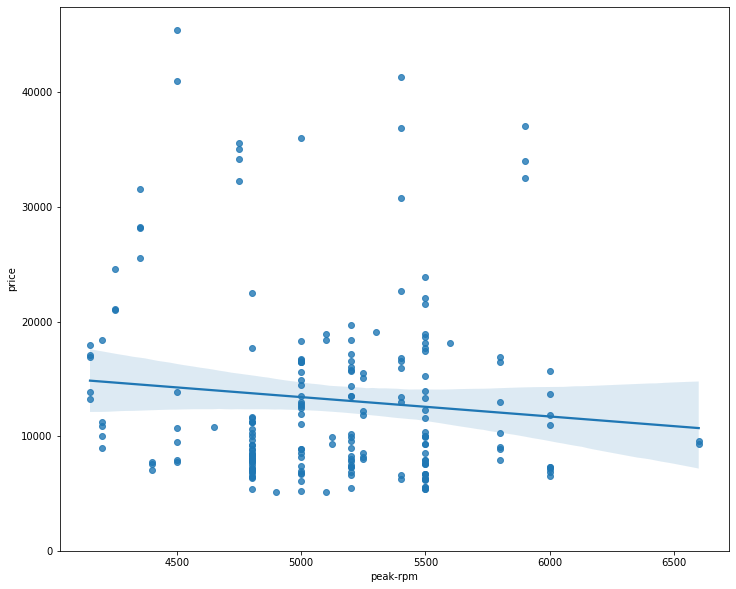

In [33]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [35]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

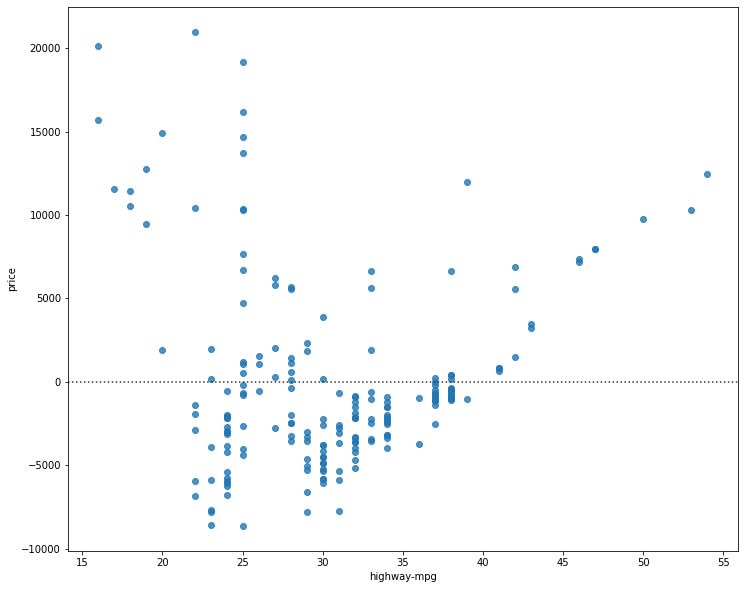

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [37]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


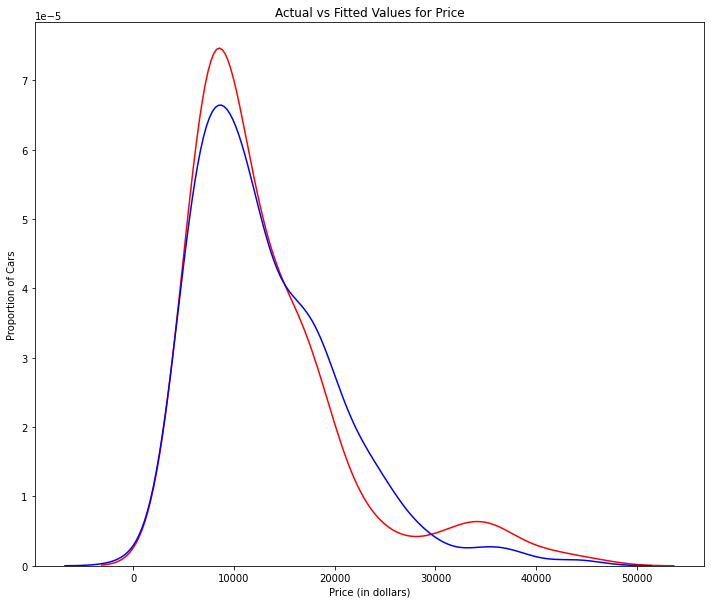

In [38]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

3. Polynomial Regression and Pipelines

In [39]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
x = df['highway-mpg']
y = df['price']

In [41]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


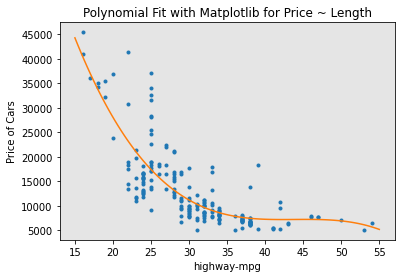

In [42]:
PlotPolly(p, x, y, 'highway-mpg')

In [43]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Question #4:
Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


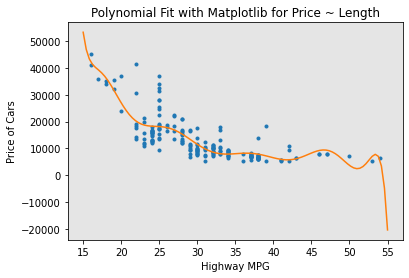

In [44]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pr=PolynomialFeatures(degree=2)

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
Z.shape

(201, 4)

In [50]:
Z_pr.shape

(201, 15)

Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [56]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

4. Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression

In [57]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [58]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [61]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [62]:
Y_predict_multifit = lm.predict(Z)

In [63]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [64]:
from sklearn.metrics import r2_score

In [65]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [66]:
mean_squared_error(df['price'], p(x))

20474146.426361218

5. Prediction and Decision Making
Prediction
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [67]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


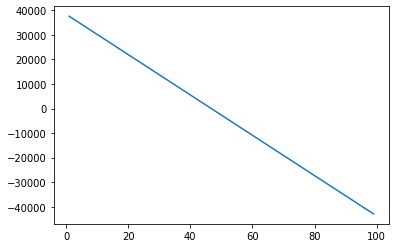

In [69]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

lm.fit(X, Y)

yhat=lm.predict(new_input)
yhat[0:5]

plt.plot(new_input, yhat)
plt.show()

Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7
Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

Simple Linear Model (SLR) vs. Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

Multiple Linear Regression (MLR) vs. Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.